In [1]:
# Import libraries
from mido import MidiFile, MidiTrack

# Import file stuff
import os

# Import basic
import pandas as pd
import numpy as np

import mido
import matplotlib.pyplot as plt
import random

# Machine Learning and Deep Learning
from torch.utils.data import Dataset, DataLoader
import torch
from torch import nn, optim


# Machine learning Metrics and Evaluations
from sklearn.metrics import accuracy_score, precision_score, f1_score, confusion_matrix

C:\Users\chris\anaconda3\envs\tensorflow\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
# Finding the notes, velocities, and duration from the midi file
def process_midi_file(filepath):
    # Create the midi object
    midi = MidiFile(filepath)

    # Empty lists to hold the values
    notes = []
    velocities = []
    durations = []

    # Iterate through the midi file via track
    # Tack is a list of messages and meta messages that we can pull from
    for track in midi.tracks:
        time = 0

        # Find the time when there is data
        for msg in track:
            time += msg.time
            
            # We only want to time it when the note is pressed
            if msg.type == 'note_on':
                notes.append(msg.note)
                velocities.append(msg.velocity)
                durations.append(time)
                time = 0
                
            # While there isn't a note played, continue through the track
            elif msg.type == 'note_off':
                time += msg.time

    return notes, velocities, durations

In [ ]:
filepath = './Composer_Dataset/NN_midi_files_extended/dev/bach/bach344.mid'
notes, velocities, durations = process_midi_file(filepath)

In [ ]:
dev_table.head()

In [ ]:
def process_midi_file_enhanced(filepath, composer, song_name):
    # number of channels possible in midi file
    num_channels = 16
    midi = MidiFile(filepath)

    notes = []
    velocities = []
    start_note = []
    stop_note = []
    is_on = []
    channel = []

    for track in midi.tracks:
        time = np.zeros(num_channels)
        for msg in track:
            if msg.type in ['note_on', 'note_off']:
                notes.append(msg.note)
                velocities.append(msg.velocity)
                start_note.append(time[msg.channel])
                time[msg.channel] += msg.time
                stop_note.append(time[msg.channel])
                channel.append(msg.channel)
            if msg.type == 'note_on':
                is_on.append(1)
            elif msg.type == 'note_off':
                is_on.append(0)
    
    temp_dict = {'note': notes, 'velocity': velocities, 'start_note': start_note, 
             'stop_note': stop_note, 'is_on': is_on, 'channel': channel}
    temp_pd = pd.DataFrame.from_dict(temp_dict)
    temp_pd['composer'] = composer
    temp_pd['song_name'] = song_name

    return temp_pd

In [ ]:
filepath = './Composer_Dataset/NN_midi_files_extended/dev/bach/bach348.mid'
midi = MidiFile(filepath)

In [ ]:
msg= midi

In [ ]:
exp = []
for row in dev_table.iterrows():
    temp_pd = process_midi_file_enhanced(row[1]['Paths'], row[1]['Composers'], row[1]['Songs'])
    exp.append(temp_pd)


In [ ]:
df_final = pd.concat(exp,ignore_index=True)    

In [ ]:
df_final

In [ ]:
df_final.iloc[df_final['stop_note'].idxmax()] 

In [ ]:
df_final.to_csv('./notes_table_dev.csv')

In [ ]:
#msg

df_final.iloc[df_final['channel'].idxmax()] 

In [ ]:
df_final.iloc[df_final['channel'].idxmin()] 

In [ ]:
msg


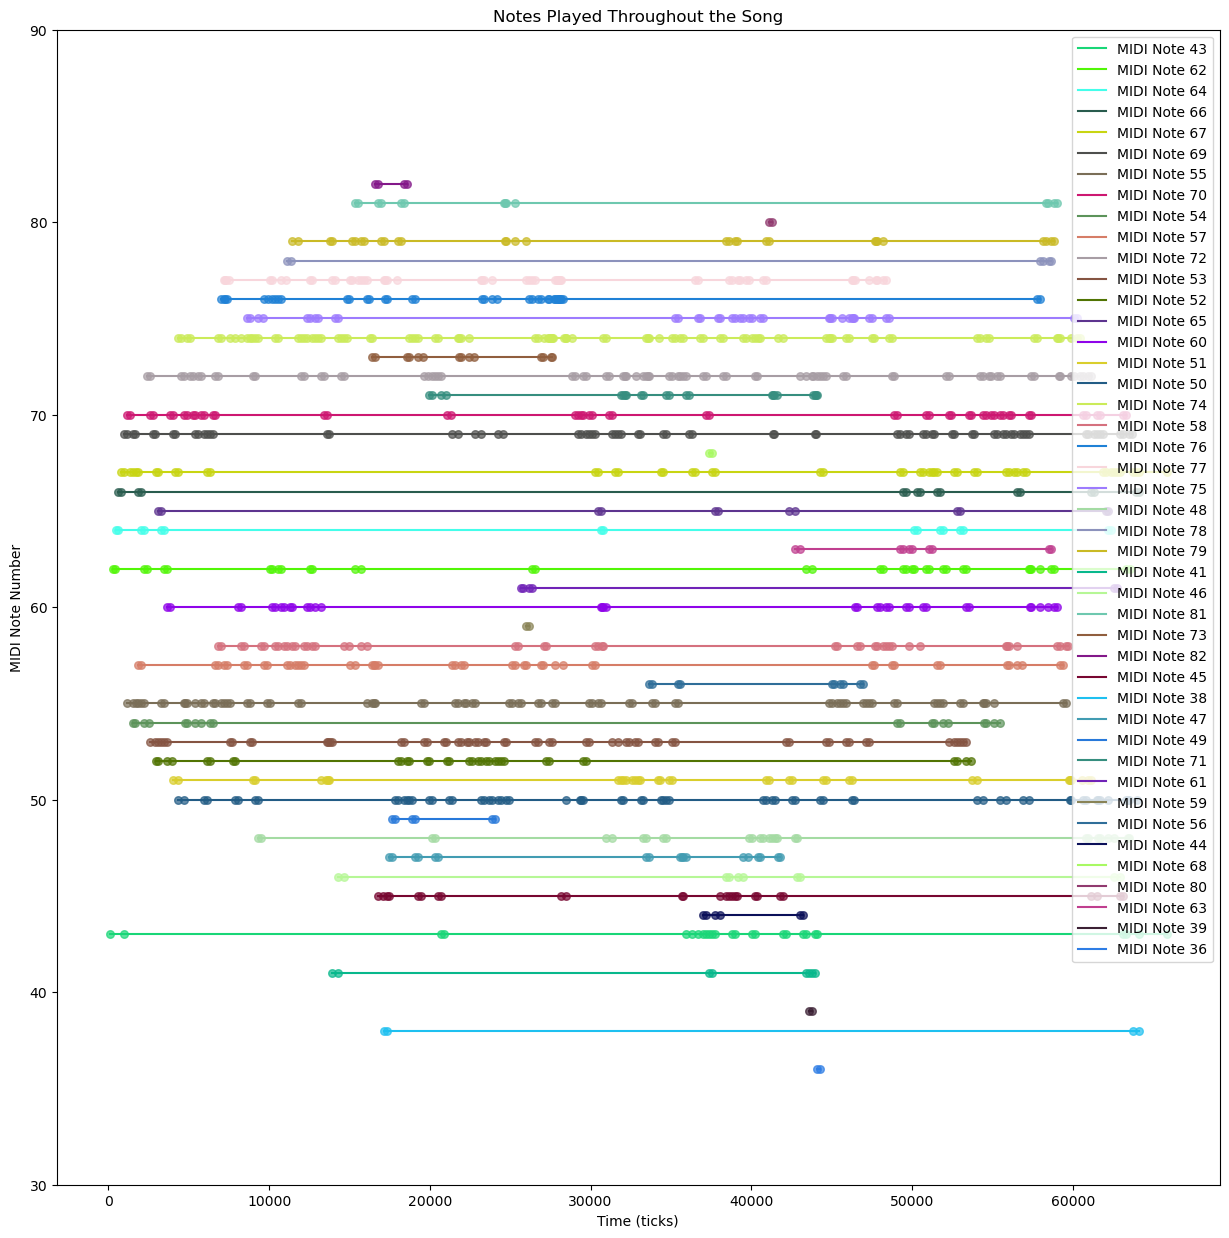

In [3]:
# Function to extract the notes played in a MIDI file with timestamps
def extract_notes_with_time(midi_filepath):
    notes = {}
    midi = mido.MidiFile(midi_filepath)
    
    for track in midi.tracks:
        time_counter = 0
        for msg in track:
            time_counter += msg.time
            
            if msg.type == 'note_on':
                if msg.velocity != 0:  # Ensure it's a Note On event
                    notes[msg.note] = notes.get(msg.note, []) + [(time_counter, 1)]  # 1 represents Note On
            elif msg.type == 'note_off':
                notes[msg.note] = notes.get(msg.note, []) + [(time_counter, 0)]  # 0 represents Note Off

    return notes

# Function to plot the notes played in a MIDI file with timestamps
def plot_notes_played_with_time(notes):
    plt.figure(figsize=(15, 15))

    # Generate random colors for each note
    color_map = {}
    for note in notes.keys():
        color_map[note] = (random.random(), random.random(), random.random())

    for note, events in notes.items():
        times, status = zip(*events)
        plt.step(times, [note] * len(times), where='post', color=color_map[note], label=f'MIDI Note {note}')
        plt.scatter(times, [note] * len(times), color=color_map[note], marker='o', s=30, alpha=0.7)

    plt.xlabel('Time (ticks)')
    plt.ylabel('MIDI Note Number')
    plt.title('Notes Played Throughout the Song')
    plt.legend(loc='upper right')
    plt.ylim(30, 90)  # Adjust the y-axis range as per your MIDI notes range
    plt.show()

# Example usage:
midi_file_path = './Composer_Dataset/NN_midi_files_extended/dev/bach/bach344.mid'
notes_with_time = extract_notes_with_time(midi_file_path)
plot_notes_played_with_time(notes_with_time)

In [4]:
notes_with_time[43]

[(88, 1),
 (975, 0),
 (20681, 1),
 (20854, 0),
 (35949, 1),
 (36299, 0),
 (36660, 1),
 (37010, 0),
 (37192, 1),
 (37365, 0),
 (37547, 1),
 (37720, 0),
 (38790, 1),
 (38963, 0),
 (40032, 1),
 (40205, 0),
 (41985, 1),
 (42158, 0),
 (43228, 1),
 (43401, 0),
 (43938, 1),
 (44111, 0),
 (63140, 1),
 (63322, 0),
 (64149, 1),
 (65846, 0)]

In [6]:
midi = mido.MidiFile(midi_file_path)
midi

MidiFile(type=1, ticks_per_beat=384, tracks=[
  MidiTrack([
    MetaMessage('set_tempo', tempo=500000, time=0),
    MetaMessage('time_signature', numerator=4, denominator=4, clocks_per_click=24, notated_32nd_notes_per_beat=8, time=0),
    MetaMessage('end_of_track', time=69120)]),
  MidiTrack([
    MetaMessage('text', text='harpsichord: John Sankey', time=0),
    Message('program_change', channel=0, program=6, time=0),
    Message('pitchwheel', channel=0, pitch=0, time=0),
    Message('program_change', channel=1, program=6, time=0),
    Message('pitchwheel', channel=1, pitch=-400, time=0),
    Message('program_change', channel=2, program=6, time=0),
    Message('pitchwheel', channel=2, pitch=-316, time=0),
    Message('program_change', channel=3, program=6, time=0),
    Message('pitchwheel', channel=3, pitch=-240, time=0),
    Message('program_change', channel=4, program=6, time=0),
    Message('pitchwheel', channel=4, pitch=-400, time=0),
    Message('program_change', channel=5, progr

In [ ]:
mykeys = notes_with_time.keys()

In [ ]:
mykeys

In [210]:
seq =  [[0] * 128] * 100

In [211]:
seq = np.array(seq)

In [ ]:
len(seq)

In [ ]:
len(sequences[0][0])

In [2]:
start = 0
tick_count = 200
sequences = 100
#channels = 16
VEL = 0
CHAN = 1
TM = 2
ON = 3

# Example usage:
midi_file_path = './Composer_Dataset/NN_midi_files_extended/dev/bach/bach344.mid'
notes_with_time = extract_notes_with_time(midi_file_path)

mykeys = notes_with_time.keys()
for i in range(128):
    if i not in (mykeys):
        notes_with_time[i] = [(0,0,0,0)]

#seq =  [[[0] * 128] * 16] * 100
seq =  [[0] * 128]* 100
seq = np.array(seq)

for x in mykeys:
    temp = np.array(notes_with_time[x])
    #temp_channel = 1
    #print(x)
    time_store = 0
    for i in range(start,sequences):
        temp_val = 0
        for t in range(time_store,temp[:,TM].size):
            if (temp[t,TM]>tick_count*i):
                #print("broken")
                break
            else:
                if temp[t,ON] == 1:
                    if temp[t,VEL] > temp_val:
                        temp_val = temp[t,VEL]
                        #temp_channel = temp[t,CHAN]
            time_store = t
        #print(f"{temp_val},{i},{CHAN},{x},{temp[time_store,TM]}")
        #seq[i,CHAN,x] = temp_val
        seq[i,x] = temp_val
                

NameError: name 'extract_notes_with_time' is not defined

In [ ]:
temp = np.array(notes_with_time[67])

In [ ]:
temp[:,2].size

In [ ]:

seq[9,:].size